In [1]:
from serpapi import GoogleSearch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime



import string
import nltk
import glob


from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kings\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kings\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#def hello_pubsub(event, context):
    
search_term = "ui ux designer"
search_location = "Sheffield"

for num in range(100):

    start = num * 10
    params = {
        "api_key": "",
        "device": "desktop",
        "engine": "google_jobs",
        "google_domain": "google.com",
        "q": search_term,
        "hl": "en",
        "gl": "us",
        "location": search_location,
        "start": start,
    }

    search = GoogleSearch(params)
    results = search.get_dict()

    # check if the last search page (i.e., no results)
    try:
        if results['error'] == "Google hasn't returned any results for this query.":
            break
    except KeyError:
        print(f"Getting SerpAPI data for page: {start}")
    else:
        continue

    # create dataframe of 10 pulled results
    jobs = results['jobs_results']
    jobs = pd.DataFrame(jobs)
    jobs = pd.concat([pd.DataFrame(jobs), 
                    pd.json_normalize(jobs['detected_extensions'])], 
                    axis=1).drop('detected_extensions', 1)
    jobs['date_time'] = datetime.datetime.utcnow()

    # concat dataframe
    if start == 0:
        jobs_all = jobs
    else:
        jobs_all = pd.concat([jobs_all, jobs])

    jobs_all['search_term'] = search_term
    jobs_all['search_location'] = search_location

    # send resluts to BigQuery
    # table_id = "xxxxxxxxxxxxxxxxxxxxxxxx" # BigQuery Table name
    # client = bigquery.Client()
    # table = client.get_table(table_id)
    # errors = client.insert_rows_from_dataframe(table, jobs_all)
    # if errors == []:
    #     print("Data loaded into table")
    #     return "Success"
    # else:
    #     print(errors)
    #     return "Failed"

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
h

In [2]:
path = r'C:\Users\kings\Documents\projects\job_requirement_analysis'

In [3]:
for name in glob.glob(path + "/*.csv"):
    print(name)

C:\Users\kings\Documents\projects\job_requirement_analysis\all_data.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\Birmingham.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\Bristol.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\Glasgow.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\Liverpool.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\london.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\manchester.csv
C:\Users\kings\Documents\projects\job_requirement_analysis\newcastle.csv


In [4]:
files = glob.glob(path + "/*.csv")

In [5]:
all_files = pd.DataFrame()
jobs = [] 

for file in files:
    
    # reading content of csv file
    all_jobs = pd.read_csv(file, index_col=None)
    jobs.append(all_jobs)
  
# converting content to data frame
all_files = pd.concat(jobs)



In [6]:
all_files.head()

,Unnamed: 0,Unnamed: 0.1,title,company_name,location,via,description,thumbnail,extensions,job_id,posted_at,schedule_type,commute_time,work_from_home,date_time,search_term,search_location,salary
0,0,0.0,Senior UX/UI Designer,Artis IT,"Bristol, UK",via Recruit.net,Senior UX/UI Designer required by our market l...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"['2 days ago', 'Full-time', 'No degree mention...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgVVgvVUkgRGVzaWduZX...,2 days ago,Full-time,NaN,NaN,2022-12-11 00:29:57.451106,ui ux designer,Bristol,NaN
1,1,1.0,Associate UI / UX Artist,Sumo Group,"Bristol, United Kingdom",via Lever,Role @ Auroch Digitial:\n\nAuroch Digital is l...,NaN,"['6 min', 'Full-time', 'No degree mentioned']",eyJqb2JfdGl0bGUiOiJBc3NvY2lhdGUgVUkgLyBVWCBBcn...,NaN,Full-time,6 min,NaN,2022-12-11 00:29:57.451106,ui ux designer,Bristol,NaN
2,2,2.0,Junior to Mid-level UX Designer,Avanti,"Bradford-on-Avon, UK",via WREG Jobs,"Junior to Mid-level UX Designer, Office based ...",https://encrypted-tbn0.gstatic.com/images?q=tb...,"['1 day ago', '£28K–£38K a year', 'Full-time',...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgdG8gTWlkLWxldmVsIF...,1 day ago,Full-time,NaN,NaN,2022-12-11 00:29:57.451106,ui ux designer,Bristol,NaN
3,3,3.0,UI / UX Artist - Remote/Hybrid,Sumo Digital,Anywhere,via AngelList,Role @ Auroch Digitial:\n\nAuroch Digital is l...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"['Work from home', 'Full-time', 'No degree men...",eyJqb2JfdGl0bGUiOiJVSSAvIFVYIEFydGlzdCAtIFJlbW...,NaN,Full-time,NaN,True,2022-12-11 00:29:57.451106,ui ux designer,Bristol,NaN
4,4,4.0,UI/UX Designer - iOS & Android Apps,Salt Search,Anywhere,via reed.co.uk,"UI/UX Designer\nFully Remote\n£45-55,000 + Ben...",NaN,"['£45K–£55K a year', 'Work from home', 'Full-t...",eyJqb2JfdGl0bGUiOiJVSS9VWCBEZXNpZ25lciAtIGlPUy...,NaN,Full-time,NaN,True,2022-12-11 00:29:57.451106,ui ux designer,Bristol,NaN


In [7]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 36
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1664 non-null   int64  
 1   Unnamed: 0.1     832 non-null    float64
 2   title            1664 non-null   object 
 3   company_name     1664 non-null   object 
 4   location         1660 non-null   object 
 5   via              1664 non-null   object 
 6   description      1664 non-null   object 
 7   thumbnail        848 non-null    object 
 8   extensions       1664 non-null   object 
 9   job_id           1664 non-null   object 
 10  posted_at        1186 non-null   object 
 11  schedule_type    1654 non-null   object 
 12  commute_time     26 non-null     object 
 13  work_from_home   290 non-null    object 
 14  date_time        1664 non-null   object 
 15  search_term      1664 non-null   object 
 16  search_location  1664 non-null   object 
 17  salary          

In [8]:
all_files['search_location'].value_counts()

Glasgow       362
Manchester    320
London        296
Liverpool     260
Birmingham    252
Bristol       100
Newcastle      74
Name: search_location, dtype: int64

In [9]:
all_files.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1        832
title                 0
company_name          0
location              4
via                   0
description           0
thumbnail           816
extensions            0
job_id                0
posted_at           478
schedule_type        10
commute_time       1638
work_from_home     1374
date_time             0
search_term           0
search_location       0
salary             1638
dtype: int64

In [10]:
all_files.shape

(1664, 18)

In [11]:
all_files.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'company_name', 'location',
       'via', 'description', 'thumbnail', 'extensions', 'job_id', 'posted_at',
       'schedule_type', 'commute_time', 'work_from_home', 'date_time',
       'search_term', 'search_location', 'salary'],
      dtype='object')

In [12]:
all_files.drop(['salary', 'work_from_home', 'commute_time', 'date_time', 'posted_at', 'thumbnail', 'Unnamed: 0', 'Unnamed: 0.1', 'job_id', 'extensions'], axis=1, inplace=True)

In [13]:
all_files.head()

,title,company_name,location,via,description,schedule_type,search_term,search_location
0,Senior UX/UI Designer,Artis IT,"Bristol, UK",via Recruit.net,Senior UX/UI Designer required by our market l...,Full-time,ui ux designer,Bristol
1,Associate UI / UX Artist,Sumo Group,"Bristol, United Kingdom",via Lever,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol
2,Junior to Mid-level UX Designer,Avanti,"Bradford-on-Avon, UK",via WREG Jobs,"Junior to Mid-level UX Designer, Office based ...",Full-time,ui ux designer,Bristol
3,UI / UX Artist - Remote/Hybrid,Sumo Digital,Anywhere,via AngelList,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol
4,UI/UX Designer - iOS & Android Apps,Salt Search,Anywhere,via reed.co.uk,"UI/UX Designer\nFully Remote\n£45-55,000 + Ben...",Full-time,ui ux designer,Bristol


In [14]:
all_files['title'].value_counts().head(20)

UI/UX Designer                                                            228
UX/UI Designer                                                            114
UX Designer                                                                94
Senior UI/UX Designer                                                      64
Senior UX Designer                                                         54
UX UI Designer                                                             46
Senior UX/UI Designer                                                      38
UI / UX Designer                                                           36
Trainee UI/ UX Designer                                                    34
Lead UX Designer                                                           26
Ui ux designer                                                             24
Lead UI/UX Designer                                                        20
UI UX Designer                                                  

In [15]:
all_files['title'].value_counts().tail(20)

Digital UX/UI Designer - First Direct                        2
UX/UI Director                                               2
UI/UX Engineer                                               2
UI Visual Designer                                           2
UI / UX Design Contractor                                    2
UX Team Lead                                                 2
Head of UI/UK                                                2
Associate UI / UX Artist                                     2
REMOTE Product Designer (UX/UI)                              2
UI/UX Designer and 3D Artist                                 2
UX/UI Web Designer                                           2
Junior UX/UI Designer                                        2
UI Senior Designer                                           2
UX designer at a data start-up                               2
Senior UX Designer - Manchester (Hybrid) £60k- £70k          2
UX/UI Designer. Job in Alderley Edge My Valley Jobs Tod

In [16]:


all_files['Job level'] = all_files['title'].str.extract(r'(Internship|Entry level|Associate|Mid-Senior|Director|Executive|Senior|Trainee|Lead|Junior|Head)')


In [17]:
all_files.head(10)

,title,company_name,location,via,description,schedule_type,search_term,search_location,Job level
0,Senior UX/UI Designer,Artis IT,"Bristol, UK",via Recruit.net,Senior UX/UI Designer required by our market l...,Full-time,ui ux designer,Bristol,Senior
1,Associate UI / UX Artist,Sumo Group,"Bristol, United Kingdom",via Lever,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,Associate
2,Junior to Mid-level UX Designer,Avanti,"Bradford-on-Avon, UK",via WREG Jobs,"Junior to Mid-level UX Designer, Office based ...",Full-time,ui ux designer,Bristol,Junior
3,UI / UX Artist - Remote/Hybrid,Sumo Digital,Anywhere,via AngelList,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,NaN
4,UI/UX Designer - iOS & Android Apps,Salt Search,Anywhere,via reed.co.uk,"UI/UX Designer\nFully Remote\n£45-55,000 + Ben...",Full-time,ui ux designer,Bristol,NaN
5,UI UX Designer,Digitech Resourcing Ltd,"Weston-super-Mare, UK",via Big Country Jobs,Our client a sports media brand are looking fo...,Full-time,ui ux designer,Bristol,NaN
6,UI/UX Designer,BPM Tech,"Oxford, UK",via My ArkLaMiss Jobs,Role: UI/UX Designer\n\nLocation: Remote based...,Full-time,ui ux designer,Bristol,NaN
7,Lead UX Designer,Barnett Waddingham,"Bristol, UK",via Barnett Waddingham - ICIMS,Overview\n\nOur IT teams are committed to meet...,Full-time,ui ux designer,Bristol,Lead
8,Senior UI/UX Digital Product Designer,Spotlight Sports Group,"Bristol, UK",via Sports Tech Jobs,Senior Digital Product Designer\n• Fully remot...,Full-time,ui ux designer,Bristol,Senior
9,UI/UX Designer,Talent Cluster Ltd,"Bristol, UK",via LinkedIn,"UX/UI Designer Your role will be to design, re...",Full-time,ui ux designer,Bristol,NaN


In [18]:
all_files['Job level'] = all_files['Job level'].replace(np.nan, 'All Level')

In [19]:
all_files.head(10)

,title,company_name,location,via,description,schedule_type,search_term,search_location,Job level
0,Senior UX/UI Designer,Artis IT,"Bristol, UK",via Recruit.net,Senior UX/UI Designer required by our market l...,Full-time,ui ux designer,Bristol,Senior
1,Associate UI / UX Artist,Sumo Group,"Bristol, United Kingdom",via Lever,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,Associate
2,Junior to Mid-level UX Designer,Avanti,"Bradford-on-Avon, UK",via WREG Jobs,"Junior to Mid-level UX Designer, Office based ...",Full-time,ui ux designer,Bristol,Junior
3,UI / UX Artist - Remote/Hybrid,Sumo Digital,Anywhere,via AngelList,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,All Level
4,UI/UX Designer - iOS & Android Apps,Salt Search,Anywhere,via reed.co.uk,"UI/UX Designer\nFully Remote\n£45-55,000 + Ben...",Full-time,ui ux designer,Bristol,All Level
5,UI UX Designer,Digitech Resourcing Ltd,"Weston-super-Mare, UK",via Big Country Jobs,Our client a sports media brand are looking fo...,Full-time,ui ux designer,Bristol,All Level
6,UI/UX Designer,BPM Tech,"Oxford, UK",via My ArkLaMiss Jobs,Role: UI/UX Designer\n\nLocation: Remote based...,Full-time,ui ux designer,Bristol,All Level
7,Lead UX Designer,Barnett Waddingham,"Bristol, UK",via Barnett Waddingham - ICIMS,Overview\n\nOur IT teams are committed to meet...,Full-time,ui ux designer,Bristol,Lead
8,Senior UI/UX Digital Product Designer,Spotlight Sports Group,"Bristol, UK",via Sports Tech Jobs,Senior Digital Product Designer\n• Fully remot...,Full-time,ui ux designer,Bristol,Senior
9,UI/UX Designer,Talent Cluster Ltd,"Bristol, UK",via LinkedIn,"UX/UI Designer Your role will be to design, re...",Full-time,ui ux designer,Bristol,All Level


In [20]:
all_files['Job level'].value_counts()

All Level     1122
Senior         334
Lead           122
Trainee         34
Junior          28
Head            12
Director         6
Associate        4
Internship       2
Name: Job level, dtype: int64

In [21]:
def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

In [22]:
all_files['job_description'] = all_files['description'].apply(cleaning)

In [23]:
all_files.head(10)

,title,company_name,location,via,description,schedule_type,search_term,search_location,Job level,job_description
0,Senior UX/UI Designer,Artis IT,"Bristol, UK",via Recruit.net,Senior UX/UI Designer required by our market l...,Full-time,ui ux designer,Bristol,Senior,senior ux ui designer required market leading ...
1,Associate UI / UX Artist,Sumo Group,"Bristol, United Kingdom",via Lever,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,Associate,role auroch digitial auroch digital hire assoc...
2,Junior to Mid-level UX Designer,Avanti,"Bradford-on-Avon, UK",via WREG Jobs,"Junior to Mid-level UX Designer, Office based ...",Full-time,ui ux designer,Bristol,Junior,junior mid level ux designer office based hybr...
3,UI / UX Artist - Remote/Hybrid,Sumo Digital,Anywhere,via AngelList,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,All Level,role auroch digitial auroch digital hire ui ux...
4,UI/UX Designer - iOS & Android Apps,Salt Search,Anywhere,via reed.co.uk,"UI/UX Designer\nFully Remote\n£45-55,000 + Ben...",Full-time,ui ux designer,Bristol,All Level,ui ux designer fully remote £ benefits client ...
5,UI UX Designer,Digitech Resourcing Ltd,"Weston-super-Mare, UK",via Big Country Jobs,Our client a sports media brand are looking fo...,Full-time,ui ux designer,Bristol,All Level,client sports media brand product designer joi...
6,UI/UX Designer,BPM Tech,"Oxford, UK",via My ArkLaMiss Jobs,Role: UI/UX Designer\n\nLocation: Remote based...,Full-time,ui ux designer,Bristol,All Level,role ui ux designer location remote based trav...
7,Lead UX Designer,Barnett Waddingham,"Bristol, UK",via Barnett Waddingham - ICIMS,Overview\n\nOur IT teams are committed to meet...,Full-time,ui ux designer,Bristol,Lead,overview teams committed meeting business evol...
8,Senior UI/UX Digital Product Designer,Spotlight Sports Group,"Bristol, UK",via Sports Tech Jobs,Senior Digital Product Designer\n• Fully remot...,Full-time,ui ux designer,Bristol,Senior,senior digital product designer • fully remote...
9,UI/UX Designer,Talent Cluster Ltd,"Bristol, UK",via LinkedIn,"UX/UI Designer Your role will be to design, re...",Full-time,ui ux designer,Bristol,All Level,ux ui designer role design research validate p...


In [24]:
skills = ['user persona', 'qauntitative research', 'qaulitative research', 'wireframing', 'prototyping',
'usability testing', 'interaction design', 'visual design', 'communication', 'problem solving',
'ux writing', 'Business acumen', 'coding', 'empathy', 'sketch', 'Invision studio', 'axure', 'craft', 
'figma', 'proto.io', 'adobe xd', 'marvel', 'figma', 'frame x', 'webflow', 'flowmapp', 'maze', 'miro', 'mockflow', 'feedier', 'uxtweak', 'talebook', 'overflow',
         'slack', 'adobe illustrator', 'microsoft office', 'excel', 'power point', 'photoshop']

In [25]:
pattern = fr"({'|'.join(skills)})"
all_files['Skills'] = all_files['job_description'].str.findall(pattern).str.join(', ')

In [26]:
all_files.head(10)

,title,company_name,location,via,description,schedule_type,search_term,search_location,Job level,job_description,Skills
0,Senior UX/UI Designer,Artis IT,"Bristol, UK",via Recruit.net,Senior UX/UI Designer required by our market l...,Full-time,ui ux designer,Bristol,Senior,senior ux ui designer required market leading ...,
1,Associate UI / UX Artist,Sumo Group,"Bristol, United Kingdom",via Lever,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,Associate,role auroch digitial auroch digital hire assoc...,"sketch, photoshop, excel, photoshop, figma"
2,Junior to Mid-level UX Designer,Avanti,"Bradford-on-Avon, UK",via WREG Jobs,"Junior to Mid-level UX Designer, Office based ...",Full-time,ui ux designer,Bristol,Junior,junior mid level ux designer office based hybr...,
3,UI / UX Artist - Remote/Hybrid,Sumo Digital,Anywhere,via AngelList,Role @ Auroch Digitial:\n\nAuroch Digital is l...,Full-time,ui ux designer,Bristol,All Level,role auroch digitial auroch digital hire ui ux...,"sketch, prototyping, figma, photoshop, excel, ..."
4,UI/UX Designer - iOS & Android Apps,Salt Search,Anywhere,via reed.co.uk,"UI/UX Designer\nFully Remote\n£45-55,000 + Ben...",Full-time,ui ux designer,Bristol,All Level,ui ux designer fully remote £ benefits client ...,craft
5,UI UX Designer,Digitech Resourcing Ltd,"Weston-super-Mare, UK",via Big Country Jobs,Our client a sports media brand are looking fo...,Full-time,ui ux designer,Bristol,All Level,client sports media brand product designer joi...,
6,UI/UX Designer,BPM Tech,"Oxford, UK",via My ArkLaMiss Jobs,Role: UI/UX Designer\n\nLocation: Remote based...,Full-time,ui ux designer,Bristol,All Level,role ui ux designer location remote based trav...,"wireframing, excel, wireframing, usability tes..."
7,Lead UX Designer,Barnett Waddingham,"Bristol, UK",via Barnett Waddingham - ICIMS,Overview\n\nOur IT teams are committed to meet...,Full-time,ui ux designer,Bristol,Lead,overview teams committed meeting business evol...,"excel, excel, prototyping, excel, visual desig..."
8,Senior UI/UX Digital Product Designer,Spotlight Sports Group,"Bristol, UK",via Sports Tech Jobs,Senior Digital Product Designer\n• Fully remot...,Full-time,ui ux designer,Bristol,Senior,senior digital product designer • fully remote...,"craft, interaction design, prototyping, user p..."
9,UI/UX Designer,Talent Cluster Ltd,"Bristol, UK",via LinkedIn,"UX/UI Designer Your role will be to design, re...",Full-time,ui ux designer,Bristol,All Level,ux ui designer role design research validate p...,


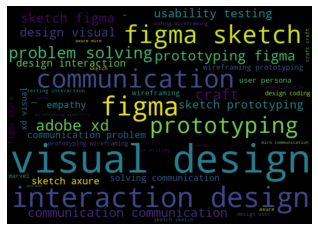

In [55]:
alltexts = ' '.join([word for word in all_files['Skills']])
wordcloud = WordCloud(width = 700, height = 500, random_state = 21, max_font_size = 200).generate(alltexts)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()